In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from copy import deepcopy

In [2]:
!which python

/Users/diegopiccinotti/opt/anaconda3/bin/python


In [9]:
budget = 1000
env = "RiverSwim"
particles = [2,4,6,8,10,12,14,16,18,20]

df = pd.read_csv("{}/pf_{}/data_eval_pf_{}_{}.csv".format(env,budget,env,budget))
df['type'] = ["pf"]*df.shape[0]

In [10]:
df_dpw = pd.read_csv("{}/dpw_{}/dpw_mcts_only_{}_{}_data_exp_0.csv".format(env,budget,env,budget))
df_dpw['type'] = ["dpw"]*df_dpw.shape[0]
df_dpw['agent'] = ["dpw"]*df_dpw.shape[0]
df_dpw

,agent,total_reward,discounted_reward,length,budget,type
0,dpw,0.0040,0.001332,10,1000,dpw
1,dpw,0.0045,0.001732,10,1000,dpw
2,dpw,0.0040,0.001332,10,1000,dpw
3,dpw,0.0045,0.001732,10,1000,dpw
4,dpw,0.0045,0.001732,10,1000,dpw
...,...,...,...,...,...,...
95,dpw,0.0045,0.001732,10,1000,dpw
96,dpw,0.0030,0.000756,10,1000,dpw
97,dpw,0.0045,0.001732,10,1000,dpw
98,dpw,0.0045,0.001732,10,1000,dpw


In [11]:
df2 = pd.read_csv("{}/paper_{}/data.csv".format(env,budget))
df2 = df2[~df2.agent.isin(['agent'])].apply(pd.to_numeric, errors='ignore')
df2 = df2.sort_values(by="agent")
df2['type'] = ["paper"]*df2.shape[0]

#dfs = [df2.copy(deep=True) for _ in range(len(particles))]

#for i in range(len(particles)):
#    dfs[i]['Particles'] = [particles[i]] * dfs[i].shape[0]
    

df3 = pd.concat([df, df2, df_dpw], ignore_index=True)
df3 = df3.sort_values(by="agent")


print(df3)

       agent  budget  discounted_reward  length    return         seed  \
449    10_pf    1000           0.001732      10       NaN          NaN   
472    10_pf    1000           0.001332      10       NaN          NaN   
471    10_pf    1000           0.001332      10       NaN          NaN   
470    10_pf    1000           0.001332      10       NaN          NaN   
469    10_pf    1000           0.001332      10       NaN          NaN   
...      ...     ...                ...     ...       ...          ...   
1371  random    1000                NaN      10  0.000377  965457055.0   
1372  random    1000                NaN      10  0.000362  965457119.0   
1373  random    1000                NaN      10  0.000000  965457130.0   
1375  random    1000                NaN      10  0.000151  965457117.0   
1349  random    1000                NaN      10  0.000650  965457054.0   

      total_reward   type  
449         0.0045     pf  
472         0.0040     pf  
471         0.0040     pf  

/Users/diegopiccinotti/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  if sys.path[0] == '':


Saving total_reward plot to RiverSwim/riverswim_total_reward_1000.png


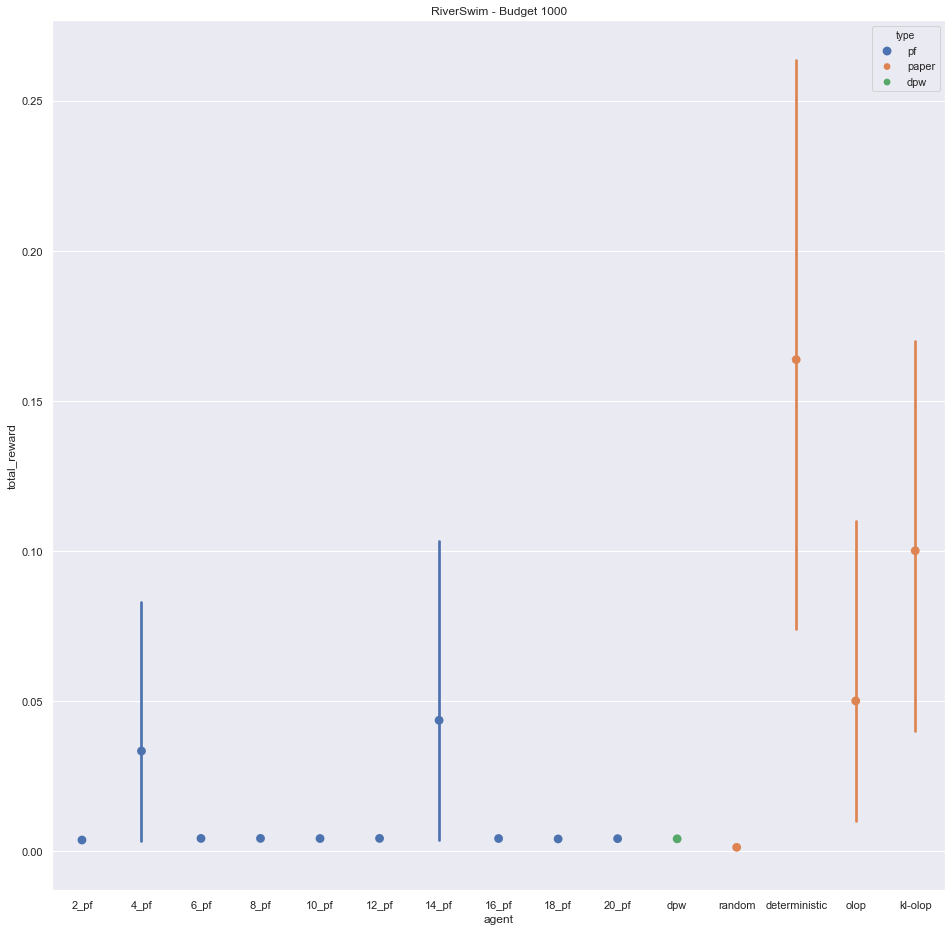

In [12]:
# print("Reading data from {}".format(data_path))
# df = pd.read_csv(data_path)
# df = df[~df.agent.isin(['agent'])].apply(pd.to_numeric, errors='ignore')
#df = df.sort_values(by="Particles")

for field in ["total_reward"]:
    #fig, ax = plt.subplots()
    sns.set(style="darkgrid")
    plt.figure(figsize=(16, 16))
    # ax.set(xscale="log")
    # sns.barplot(x="Particles", y="Cumulative reward", hue="Particles", data=df, dodge=False)
    #sns.pointplot(x="Particles", y="Cumulative reward", ax=ax, data=df, join=False, grid=True)
    plot = sns.pointplot(x="agent", y="total_reward", data=df3, hue="type", legend=False, join=False,
                        order=["2_pf", "4_pf", "6_pf", "8_pf", "10_pf", "12_pf", "14_pf","16_pf","18_pf","20_pf", "dpw", "random", "deterministic", "olop", "kl-olop"])
    #plot2 = sns.pointplot(x="agent", y="total_reward", hue="type", data=df, legend=False)
    
    plot.set_title("{} - Budget {}".format(env, budget))

    
    field_path = "{}/{}_{}_{}.png".format(env, env.lower(), field, budget)
    plot.get_figure().savefig(field_path, bbox_inches='tight')
    # plt.show()
    print("Saving {} plot to {}".format(field, field_path))